Full Name:

Student ID:

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = '20520115'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit. 
Otherwise, check the code carefully.


# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

In [143]:
# Code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [144]:
# Load the fish dataset
df = pd.read_csv('fish.csv')
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [145]:
X = df.drop(columns=['Weight'])
X = X.drop(columns=['Width']).values
y = df['Width'].values  

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20520115)

In [147]:
class LinearRegression_GD:
  def __init__(self, eta=1e-4, max_iter=200, random_state=20520115):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = 20520115
    self.w = None
    self.costs = []


  def predict(self, X):
    return np.dot(X, self.w[1:])+self.w[0]


  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.costs = [ ]
    for n_iters in range(self.max_iter):
      y_pred = self.predict(X)
      diff = y - y_pred
      self.w[0] += self.eta * np.sum(diff)
      for j in range(X.shape[1]):
        delta = 0.0
        for i in range(X.shape[0]):
          delta += self.eta * diff[i] * X[i][j]
        self.w[j + 1] += delta
      cost = np.sum(diff ** 2) / 2
      self.costs.append(cost)

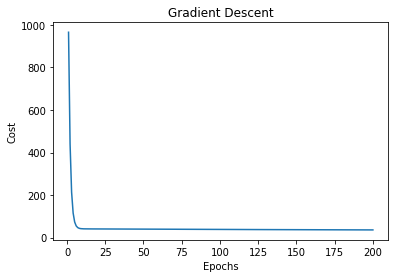

In [148]:
#Gradient Descent
reg_GD =  LinearRegression_GD(eta=0.000001, max_iter=200,random_state =20520115)
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [149]:
reg_SGD = SGDRegressor (eta0=0.000001, max_iter=200, random_state=20520115, learning_rate= 'constant')
reg_SGD.fit(X_train, y_train)

SGDRegressor(eta0=1e-06, learning_rate='constant', max_iter=200,
             random_state=20520115)

In [150]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()
# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

In [151]:
#Algorithms Comparisons
w_GD = reg_GD.w
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
print(w_GD)
print(w_SGD)
print(w_NE)

[0.00090163 0.04408233 0.04821869 0.04518834 0.04621686]
[0.00160004 0.04425231 0.04809305 0.05286925 0.01823381]
[ 0.29309729 -0.01988538  0.76610574 -0.65047297  0.35225837]


In [152]:
y_pred_GD = reg_GD.predict(X_test)

In [153]:
y_pred_SGD = reg_SGD.predict(X_test)

In [154]:
y_pred_NE = reg_NE.predict(X_test)

In [155]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 0.43306
MAE of SGD: 0.459355
MAE of NE: 0.392215


In [156]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 0.43306
MAE of SGD: 0.459355
MAE of NE: 0.392215


In [157]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 0.366493
MSE of SGD: 0.419101
MSE of NE: 0.249217


In [158]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.852814
R2 of SGD: 0.831686
R2 of NE: 0.899913


# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [159]:
# Code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [165]:
dt = pd.read_csv('insurance.csv')
dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [167]:
X_new = dt.drop(columns=['charges']).values
y = dt['charges'].values

In [168]:
class LinearRegression_GD:
  def __init__(self, eta=1e-4, max_iter=200, random_state=20520115):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = 20520115
    self.w = None
    self.costs = []


  def predict(self, X):
    return np.dot(X, self.w[1:])+self.w[0]


  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.costs = [ ]
    for n_iters in range(self.max_iter):
      y_pred = self.predict(X)
      diff = y - y_pred
      self.w[0] += self.eta * np.sum(diff)
      for j in range(X.shape[1]):
        delta = 0.0
        for i in range(X.shape[0]):
          delta += self.eta * diff[i] * X[i][j]
        self.w[j + 1] += delta
      cost = np.sum(diff ** 2) / 2
      self.costs.append(cost)

In [170]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [176]:
# Initialize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = LinearRegression_GD(eta=1e-3, max_iter=200, random_state=42)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), np.array(reg_GD.costs))
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

TypeError: ignored

In [ ]:
reg_SGD = SGDRegressor (eta0=0.000001, max_iter=200, random_state=20520115, learning_rate= 'constant')
reg_SGD.fit(X_train, y_train)

In [ ]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()
# Train model
reg_NE.fit(X_train, y_train)

In [ ]:
#Algorithms Comparisons
w_GD = reg_GD.w
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
print(w_GD)
print(w_SGD)
print(w_NE)

In [ ]:
y_pred_GD = reg_GD.predict(X_test)

In [ ]:
y_pred_SGD = reg_SGD.predict(X_test)

In [ ]:
y_pred_NE = reg_NE.predict(X_test)

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [ ]:
# Code here
